# Switchiness- Methylation

In [1]:
cd ..

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [2]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from /cellar/users/agross/anaconda2/lib/python2.7/site-packages/MethylTools/Probe_Annotations

In [3]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [4]:
from Imports import *
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
TGCT
CHOL
THYM
MESO
FPPP


/cellar/users/agross/anaconda2/lib/python2.7/site-packages/Processing/ProcessClinicalDataPortal.py:37: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  f['vitalstatus'] = f['daystodeath'].isnull()


#### Reconstruct meta-PCNA signature

In [5]:
g = ['PCNA', 'CKS2', 'NUSAP1', 'RRM2', 'ZWINT', 
     'PRC1', 'TFDP1', 'CCNA2', 'CCNB1', 'MELK', 
     'TPX2', 'BIRC5', 'NCAPG2', 'RFWD3', 'TACC3', 
     'KIAA0101', 'MCM2', 'MCM5', 'ASF1B', 'CCNB2', 
     'GTPBP2', 'KIF20A', 'PTTG1', 'AURKA', 'CDC20', 
     'FOXM1', 'GINS2', 'MAD2L1', 'UBE2C', 'GINS1', 
     'MCM6', 'NCAPD2', 'NUP37', 'CKS1B', 'MCM7', 
     'ARID3A', 'AURKB', 'CDCA8', 'SNRPD1', 'TROAP', 
     'C21orf45', 'DDX39', 'ESPL1', 'HMBS', 'LSM6', 
     'MCM4', 'NCAPD3', 'PPIH', 'DTL', 'EPB42', 'HMGN2',
     'MCM3', 'PF4', 'PPBP', 'RFC4', 'TOP2A', 'BUB1B', 
     'CDT1', 'FEN1', 'GATA1', 'GYPB', 'HMGB2', 'KIF22', 
     'KLF1', 'MLF1IP', 'RFC3', 'RHCE', 'TAL1', 'TCF3', 
     'ALAS2', 'CDCA3', 'CENPA', 'CKLF', 'GTSE1', 
     'NFE2', 'OIP5', 'SHCBP1', 'SNF8', 'SNRPB', 'SPTA1', 
     'KEL', 'KIF2C', 'LYL1', 'PSMD9', 'RACGAP1', 'RPIA',
     'TIMELESS', 'TRMT5', 'TYMS', 'VRK1', 'FBXO7', 'H3F3A',
     'NUDT1', 'PLEK', 'POLE2', 'RHAG', 'WHSC1', 'APOBEC3B', 
     'BPGM', 'CHAF1A', 'DNAJC9', 'FBXO5', 'KIF4A', 'KLF15', 
     'MKI67', 'PGD', 'RPA3', 'SFRS2', 'TRIM58', 'ADAMTS13', 
     'CDCA4', 'CDKN3', 'FECH', 'LBR', 'LIG1', 'LMNB1', 'MICB', 
     'NUP210', 'ORC6L', 'RAD51AP1', 'RHD', 'SMC4', 'GYPA', 
     'RPP30', 'TRIM10']
meta_pcna = rna_df.ix[g].median()[:,'01']
meta_pcna.name = 'meta_pcna'
len(meta_pcna)

9051

#### Compare meta-PCNA to methylation-tumorness

In [278]:
meth_tumorness = pd.read_csv('./proliferation_methylation.csv', header=None, 
                             index_col=[0,1], squeeze=True)
meth_tumorness = meth_tumorness[:,1]

In [7]:
mpn = ((meta_pcna - meta_pcna.mean()) / 
       (meta_pcna.max() - meta_pcna.min()))
mpn.name = 'meta PCNA'

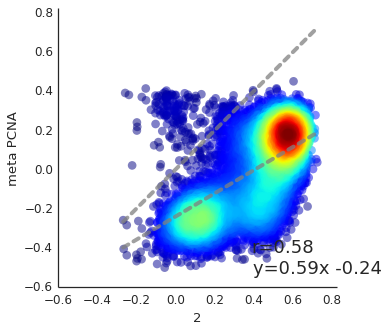

In [8]:
plot_regression(meth_tumorness, mpn, density=True, rad=.1)

#### Generate probe-level coorelation with meta-PCNA 
* This takes a while, I'm doing it in chunks

In [37]:
standardize = lambda s: s.sub(s.median(1), axis=0).div(s.mad(1), axis=0)
mp2 = meta_pcna.groupby(codes).apply(standardize).dropna()

In [10]:
store = pd.HDFStore('/data_ssd/TCGA_methylation_2015_04_02_matched.h5')

In [13]:
cc = [c[1:] for c in store.keys() if c[1:] in codes.unique()]

In [44]:
itr = store.select_as_multiple(cc, chunksize=20000)

In [45]:
pcna_corr = []
for df in itr:
    print df.shape
    df = df.xs('01',1,1)
    df = df.groupby(codes, axis=1).apply(standardize)
    corr = df.T.corrwith(mp2)
    pcna_corr.append(corr)
pcna_corr = pd.concat(pt)

(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(20000, 8780)
(15883, 8780)


In [54]:
pearson_pandas(pcna_corr, dx_meth.frac)

rho    0.75
p      0.00
dtype: float64

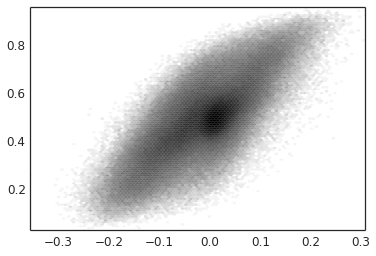

In [66]:
a,b = match_series(pcna_corr, dx_meth.frac)
plt.hexbin(a,b, bins='log')

In [89]:
pearson_pandas(pcna_corr, dx_meth.frac)

rho    0.75
p      0.00
dtype: float64

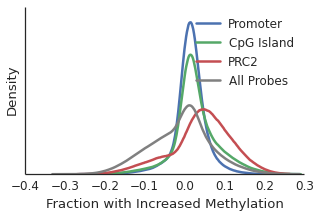

In [62]:
fig, ax = subplots(1,1, figsize=(5,3))
lw = 2.5
draw_dist(pcna_corr.ix[ti(DX.probe_sets['Promoter'])], ax=ax, lw=lw)
draw_dist(pcna_corr.ix[ti(DX.probe_sets['CpG Island'])], ax=ax, lw=lw)
draw_dist(pcna_corr.ix[ti(DX.probe_sets['PRC2'])], ax=ax, lw=lw)
draw_dist(pcna_corr, ax=ax, colors='grey', lw=lw)
ax.set_yticks([])
ax.set_ylabel('Density')
ax.set_xlabel('Fraction with Increased Methylation')
ax.legend(('Promoter','CpG Island','PRC2','All Probes'))
prettify_ax(ax)

In [72]:
ann = DX.probe_annotations

In [92]:
m = pd.rolling_mean(dx_meth.frac.ix[pcna_corr.order().index].dropna(), 
                    window=500, center=True).dropna()
m2 = pd.rolling_mean(dx_meth.frac.ix[pcna_corr.order().index].dropna(), 
                    window=50, center=True).dropna()
m = m.combine_first(m2)
f_win = (dx_meth.frac - m).dropna()

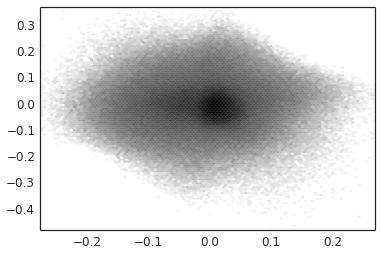

In [96]:
a,b = match_series(pcna_corr, f_win)
plt.hexbin(a,b, bins='log')

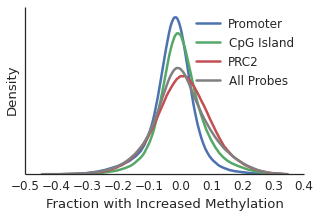

In [94]:
fig, ax = subplots(1,1, figsize=(5,3))
lw = 2.5
draw_dist(f_win.ix[ti(DX.probe_sets['Promoter'])], ax=ax, lw=lw)
draw_dist(f_win.ix[ti(DX.probe_sets['CpG Island'])], ax=ax, lw=lw)
draw_dist(f_win.ix[ti(DX.probe_sets['PRC2'])], ax=ax, lw=lw)
draw_dist(f_win, ax=ax, colors='grey', lw=lw)
ax.set_yticks([])
ax.set_ylabel('Density')
ax.set_xlabel('Fraction with Increased Methylation')
ax.legend(('Promoter','CpG Island','PRC2','All Probes'))
prettify_ax(ax)

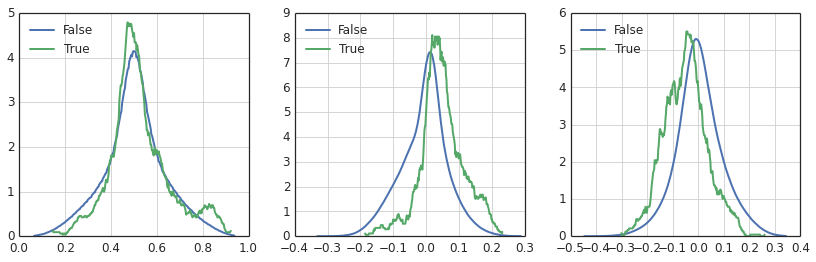

In [95]:
fig, axs = subplots(1,3, figsize=(14,4))
draw_dist(dx_meth.frac, ann.Gene_Symbol.str.startswith('HIST').dropna(), ax=axs[0])
draw_dist(pcna_corr, ann.Gene_Symbol.str.startswith('HIST').dropna(), ax=axs[1])
draw_dist(f_win, ann.Gene_Symbol.str.startswith('HIST').dropna(), ax=axs[2])

In [137]:
d = f_win.ix[ti(DX.probe_sets['Gene Body'])].dropna()
d.name = 'd'
dd = ann.join(d).sort('d').dropna().join(dx_rna.frac, on='Gene_Symbol')
vec = dd.set_index('Gene_Symbol')['d']

In [123]:
gs2 = gene_sets.ix[vec.index].fillna(0)
r2 = screen_feature(vec, rev_kruskal, gs2.T, 
                    align=False)

In [124]:
r2.head()

,H,p,q
KEGG_ENDOCYTOSIS,152.74,4.36e-35,5.80e-32
REACTOME_GPVI_MEDIATED_ACTIVATION_CASCADE,124.32,7.16e-29,4.76e-26
REACTOME_TGF_BETA_RECEPTOR_SIGNALING_IN_EMT_EPITHELIAL_TO_MESENCHYMAL_TRANSITION,114.89,8.34e-27,3.70e-24
PID_AMB2_NEUTROPHILS_PATHWAY,105.03,1.21e-24,4.01e-22
PID_INSULIN_GLUCOSE_PATHWAY,104.36,1.69e-24,4.49e-22


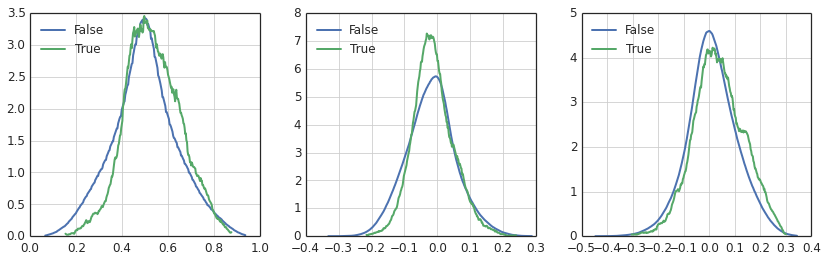

In [126]:
fig, axs = subplots(1,3, figsize=(14,4))
v = ann.Gene_Symbol.isin(ti(gs2['KEGG_ENDOCYTOSIS']>0)).dropna()
v = v.ix[ti(DX.probe_sets['Gene Body'])].dropna()
draw_dist(dx_meth.frac, v, ax=axs[0])
draw_dist(pcna_corr, v, ax=axs[1])
draw_dist(f_win, v, ax=axs[2])

In [140]:
d = f_win.ix[ti(DX.probe_sets['CpG Island'])].dropna()
d.name = 'd'
dd = ann.join(d).sort('d').dropna().join(dx_rna.frac, on='Gene_Symbol')
vec = dd.set_index('Gene_Symbol')['d']

In [142]:
gs2 = gene_sets.ix[vec.index].fillna(0)
r2 = screen_feature(vec, rev_kruskal, gs2.T, 
                    align=False)

In [143]:
r2.head()

,H,p,q
KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION,204.66,2.00e-46,2.67e-43
REACTOME_SIGNALING_BY_GPCR,186.26,2.08e-42,1.38e-39
REACTOME_GPCR_DOWNSTREAM_SIGNALING,175.56,4.52e-40,2.00e-37
REACTOME_NEURONAL_SYSTEM,148.83,3.12e-34,1.04e-31
NABA_MATRISOME,118.94,1.08e-27,2.87e-25


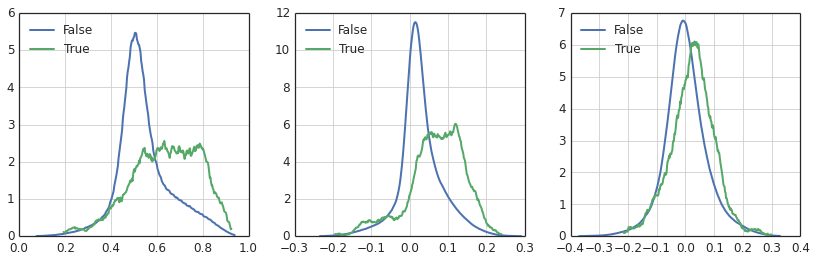

In [149]:
fig, axs = subplots(1,3, figsize=(14,4))
v = ann.Gene_Symbol.isin(ti(gs2['KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION']>0)).dropna()
v = v.ix[ti(DX.probe_sets['CpG Island'])].dropna()
draw_dist(dx_meth.frac, v, ax=axs[0])
draw_dist(pcna_corr, v, ax=axs[1])
draw_dist(f_win, v, ax=axs[2])

In [159]:
v1 = dd['d']
g1 = dd['Gene_Symbol']

In [157]:
gg = ti(gs2['KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION']>0)

In [161]:
by_gene = pd.DataFrame({g: anova(g1 == g, v1) for g in gg}).T

In [209]:
by_gene.sort('p').head(20)

,F,p
DRD4,43.35,4.59e-11
KISS1R,32.66,1.10e-08
EDNRB,31.04,2.54e-08
PRLHR,29.61,5.28e-08
HTR6,27.12,1.91e-07
OXTR,27.02,2.01e-07
F2RL1,20.26,6.78e-06
P2RY2,20.21,6.96e-06
DRD5,19.87,8.30e-06
GABBR2,16.22,5.66e-05


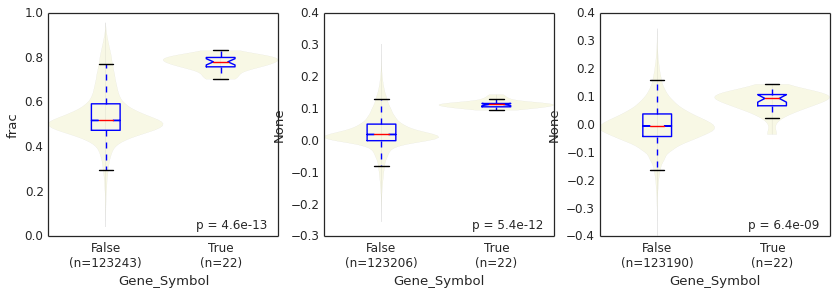

In [215]:
fig, axs = subplots(1,3, figsize=(14,4))
v = ann.Gene_Symbol == 'EDNRB'
v = v.ix[ti(DX.probe_sets['CpG Island'])].dropna()
violin_plot_pandas(v, dx_meth.frac, ax=axs[0])
violin_plot_pandas(v, pcna_corr, ax=axs[1])
violin_plot_pandas(v, f_win, ax=axs[2])

In [216]:
dr = list(ti(v))
m = store.select_as_multiple(cc, where='index in dr')
m = m.xs('01',1,1)

In [217]:
screen_feature(rna_df.ix['EDNRB'][:,'01'], pearson_pandas, m, align=False)

,rho,p,q
cg19650157,-0.44,1.22e-312,2.69e-311
cg23766591,-0.43,5.37e-304,5.91e-303
cg13434989,-0.43,2.33e-295,1.71e-294
cg04390523,-0.42,1.32e-293,7.24e-293
cg12847373,-0.42,1.63e-292,7.15e-292
cg19916212,-0.42,4.52e-292,1.66e-291
cg22310279,-0.42,1.22e-291,3.82e-291
cg24236409,-0.42,8.70e-290,2.39e-289
cg01910869,-0.42,1.34e-287,3.27e-287
cg13818654,-0.42,8.42e-284,1.85e-283


In [203]:
vh = frame_svd(m)[2][0]

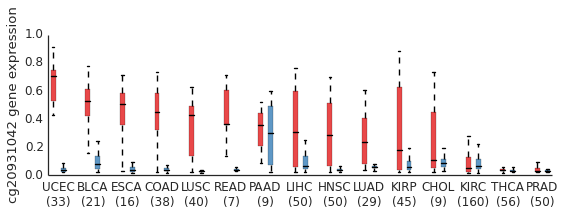

In [207]:
paired_bp_tn_split(m.ix['cg20931042'], codes)

In [261]:
d = dx_meth.frac.ix[ti(DX.probe_sets['CpG Island'])].dropna()
d.name = 'd'
dd = ann.join(d).sort('d').dropna().join(dx_rna.frac, on='Gene_Symbol')
vec = dd.set_index('Gene_Symbol')['d']

In [262]:
gs2 = gene_sets.ix[vec.index].fillna(0)
r2 = screen_feature(vec, rev_kruskal, gs2.T, 
                    align=False)

In [281]:
r2.head()

,H,p,q
REACTOME_GPCR_LIGAND_BINDING,771.21,9.81e-170,1.31e-166
KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION,760.60,1.99e-167,1.32e-164
REACTOME_GPCR_DOWNSTREAM_SIGNALING,698.06,7.90e-154,3.50e-151
REACTOME_SIGNALING_BY_GPCR,687.33,1.70e-151,5.66e-149
REACTOME_CLASS_A1_RHODOPSIN_LIKE_RECEPTORS,595.19,1.86e-131,4.95e-129


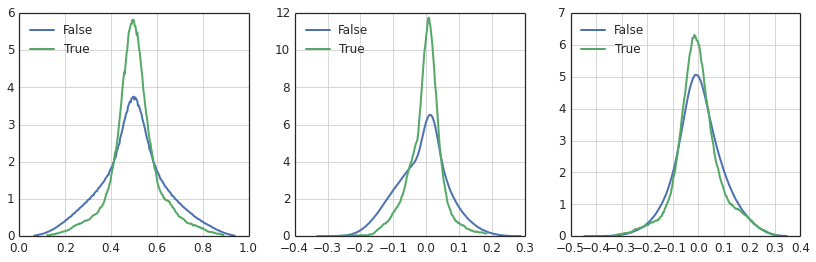

In [272]:
fig, axs = subplots(1,3, figsize=(14,4))
v = ann.Gene_Symbol.isin(ti(gs2['REACTOME_CELL_CYCLE']>0)).dropna()
draw_dist(dx_meth.frac, v, ax=axs[0])
draw_dist(pcna_corr, v, ax=axs[1])
draw_dist(f_win, v, ax=axs[2])

In [275]:
v.value_counts()

False    479465
True       6112
dtype: int64

In [274]:
anova(v, (dx_meth.frac - .5).abs())

F     7.61e+02
p    2.97e-167
dtype: float64

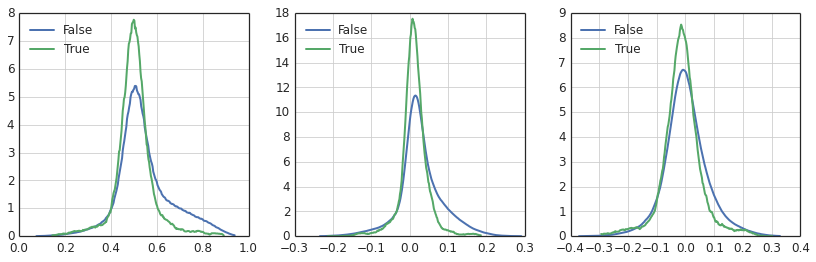

In [264]:
fig, axs = subplots(1,3, figsize=(14,4))
v = ann.Gene_Symbol.isin(ti(gs2['REACTOME_CELL_CYCLE']>0)).dropna()
v = v.ix[ti(DX.probe_sets['CpG Island'])].dropna()
draw_dist(dx_meth.frac, v, ax=axs[0])
draw_dist(pcna_corr, v, ax=axs[1])
draw_dist(f_win, v, ax=axs[2])

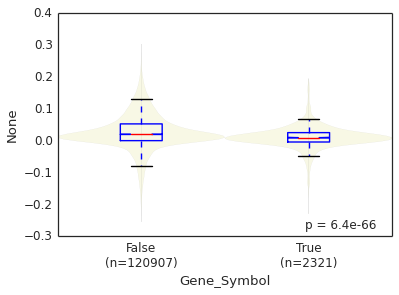

In [265]:
violin_plot_pandas(v, pcna_corr)

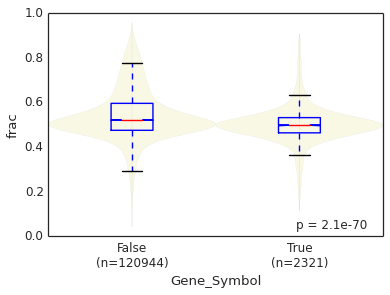

In [266]:
violin_plot_pandas(v, dx_meth.frac)